# open cv 통한 얼굴 검출

[[566 105 369 369]]
1


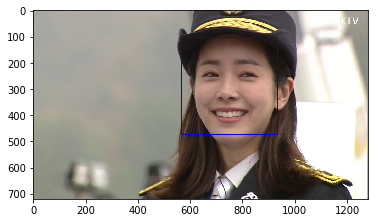

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

img = cv2.imread('./images/image1.jpg')
#img2 = cv2.imread('./images/image2.png')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# scaleFactor : 각 이미지크기에서 이미지크기가 감소되는 양
# 크기를 줄임으로써 감지 모델과 일치할 확률 증가하지만 더 느려짐
# minNeighbors : 각 후보 사각형을 유지해야하는 이웃 수를 지정
#, 값이 높을 수록 탐지는 적지만 품질은 높아짐
faces = face_cascade.detectMultiScale(gray_img,scaleFactor=1.1, minNeighbors=5)
print(faces)
for (x,y,w,h) in faces:
    print(1)
    img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
    y_ = y
    y_h = y+h
    x_ = x
    x_w = x+w
    roi_gray = gray_img[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [14]:

print("{} 순서대로 x,y,w,h".format(faces))

[[566 105 369 369]] 순서대로 x,y,w,h


True

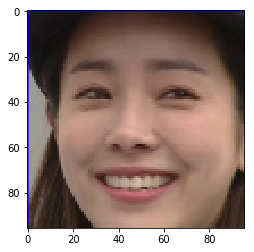

In [15]:
reduction_img = img[y_:y_h, x_:x_w]
reduction_img = cv2.resize(reduction_img,dsize=(96,96))
plt.imshow(reduction_img)
reduction_img = cv2.cvtColor(reduction_img, cv2.COLOR_BGR2RGB)
# 저장
cv2.imwrite('./images/reduction_img.jpg', reduction_img)

# dlib 통한 얼굴 검출
- HOG 통해 이미지에서 밝기변화량을 척도로 얼굴인식

## land mark 찍기
- dlib로 얼굴 찾고
- dlib로 land mark 찍고
- dlib로 사이즈 줄이기

len(land_mark) : 68


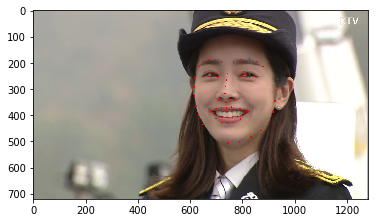

In [87]:
import dlib

img_path = './images/image1.jpg'
img = cv2.imread(img_path)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# land mark 찍는 model
predictor_model = "./shape_predictor_68_face_landmarks.dat"

# 얼굴 검출
face_detector = dlib.get_frontal_face_detector()
# land mark 검출
face_pose_predictor = dlib.shape_predictor(predictor_model)
# face rect
detected_face = face_detector(gray_img, 1)

for face_rect in detected_face:
    pose_landmarks = face_pose_predictor(img, face_rect) 
    print("len(land_mark) : {}".format(len(pose_landmarks.parts())))
    for pos in pose_landmarks.parts():
        cv2.circle(img, (pos.x,pos.y), 3, (0, 0, 255), -1)
    # BGR을 RGB로 바꿔줌 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)    

# dlib
- 얼굴영역 dlib로 찾고
    - HOG 통해 open cv보다 좀 더 정확하게 얼굴을 찾아낼 수 있음
- 영역 resize하고
- land mark 찾고

__여러 얼굴 나왔을때 제일 크게 검출되는 하나만 뽑는 function__

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def detected_face(face_area, one_image=True):
    # 검출되는 얼굴영역이 여러개 일때는
    # 가장 크게 잡힌 영역을 얼굴로 보도록 함
    if len(face_area) > 1:
        if one_image:
            max_rect_area = [0,0]
            for i, rect in enumerate(face_area):
                rect_area = ((rect.top() - rect.bottom()) * (rect.right()- rect.left()))
                if rect_area > max_rect_area[1]:
                    max_rect_area = [i, rect_area]
    else:
        return [face_area[0]]
    
    return [face_area[max_rect_area[0]]]

left : 598 top : 170 right : 919 bottom : 491


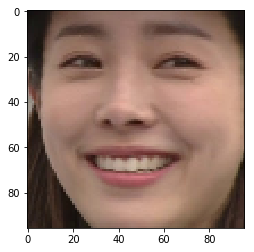

In [3]:
import dlib

img_path = './images/image1.jpg'
img = cv2.imread(img_path)
# 얼굴 영역을 HOG를 통해 찾음
# 어차피 픽셀의 밝기변화량으로 얼굴 찾는거기떄문에 gray image로 바꿔 연산량을 줄여줌
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# dlib face detector
face_detector = dlib.get_frontal_face_detector()

face_area = face_detector(gray_img, 1)
# 얼굴이 검출 됐을 때
if len(face_area) != 0:
# 얼굴이 검출 됐을때 얼굴이 여러개나오면 가장 큰 영역 얼굴로 사용
    face_rect = detected_face(face_area)
    for fr in face_rect:
        print("left : {} top : {} right : {} bottom : {}".format(fr.left(), fr.top(), fr.right(), fr.bottom()))
        # 얼굴 영역 자르고
        reduction_img = img[fr.top():fr.bottom(), fr.left():fr.right()]
        # 96x96으로 변환
        reduction_img = cv2.resize(reduction_img, (96,96))
        # 저장
        cv2.imwrite('./images/reduction_img.jpg', reduction_img)
        #img = cv2.rectangle(img, (fr.left(), fr.top()), (fr.right(), fr.bottom()), (255,0,0), 1)
        # plt로 출력하려면 bgr을 rgb로 바꿔줘야함
        reduction_img = cv2.cvtColor(reduction_img, cv2.COLOR_BGR2RGB)
    plt.imshow(reduction_img)    

In [19]:
# land mark를 포함하는 rect 좌표
def min_max_pos(landmakrs_pos):
    x_list = []
    y_list = []
    for pos in landmakrs_pos:
        x_list.append(pos.x)
        y_list.append(pos.y)
    left_top = (min(x_list)-1, max(y_list)+1)
    right_bottom = (max(x_list)+1, min(y_list)-1)
    return left_top, right_bottom

In [35]:
print(left_top)
print(right_bottom)

(614, 507)
(934, 185)
